<a href="https://colab.research.google.com/github/aarif72/Stock-Price-Prediction/blob/main/Wipro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
import pandas as pd
df=pd.read_csv('/content/WIT.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-24,5.09,5.22,5.05,5.19,5.082677,1329800
1,2018-08-27,5.21,5.22,5.15,5.16,5.053298,552100
2,2018-08-28,5.17,5.18,5.12,5.17,5.063091,365800
3,2018-08-29,5.15,5.17,5.14,5.16,5.053298,200000
4,2018-08-30,5.21,5.21,5.11,5.12,5.014124,474000
...,...,...,...,...,...,...,...
1252,2023-08-17,4.98,5.00,4.97,4.98,4.980000,1537700
1253,2023-08-18,4.89,4.95,4.89,4.94,4.940000,1534000
1254,2023-08-21,4.96,4.99,4.95,4.98,4.980000,472000
1255,2023-08-22,4.96,5.00,4.96,4.99,4.990000,1544200


In [14]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-08-24,5.09,5.22,5.05,5.19,5.082677,1329800
1,2018-08-27,5.21,5.22,5.15,5.16,5.053298,552100
2,2018-08-28,5.17,5.18,5.12,5.17,5.063091,365800
3,2018-08-29,5.15,5.17,5.14,5.16,5.053298,200000
4,2018-08-30,5.21,5.21,5.11,5.12,5.014124,474000


In [15]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
1252,2023-08-17,4.98,5.00,4.97,4.98,4.98,1537700
1253,2023-08-18,4.89,4.95,4.89,4.94,4.94,1534000
1254,2023-08-21,4.96,4.99,4.95,4.98,4.98,472000
1255,2023-08-22,4.96,5.00,4.96,4.99,4.99,1544200
1256,2023-08-23,5.00,5.09,5.00,5.09,5.09,1396700


In [16]:
df=df[['Close']]
df

,Close
0,5.19
1,5.16
2,5.17
3,5.16
4,5.12
...,...
1252,4.98
1253,4.94
1254,4.98
1255,4.99


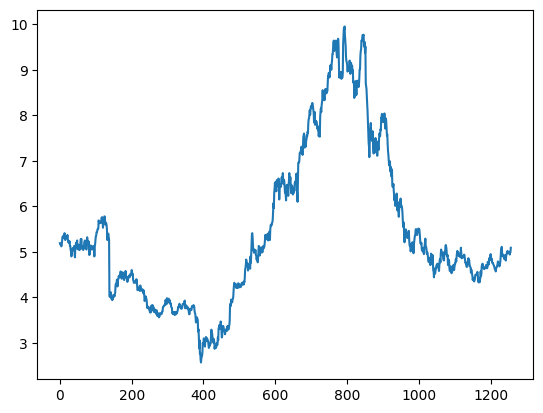

In [17]:
import matplotlib.pyplot as plt
plt.plot(df)

In [18]:
### LSTM are sensitive to the scale of the data. so we apply MinMax scaler

In [19]:
import numpy as np

In [20]:
df

,Close
0,5.19
1,5.16
2,5.17
3,5.16
4,5.12
...,...
1252,4.98
1253,4.94
1254,4.98
1255,4.99


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df=scaler.fit_transform(np.array(df).reshape(-1,1))

In [23]:
print(df)

[[0.35501355]
 [0.35094851]
 [0.35230352]
 ...
 [0.32655827]
 [0.32791328]
 [0.34146341]]


In [24]:
##splitting dataset into train and test split
training_size=int(len(df)*0.65)
test_size=len(df)-training_size
train_data,test_data=df[0:training_size,:],df[training_size:len(df),:1]

In [25]:
training_size,test_size

(817, 440)

In [26]:
train_data

array([[0.35501355],
       [0.35094851],
       [0.35230352],
       [0.35094851],
       [0.34552846],
       [0.3495935 ],
       [0.36178862],
       [0.37127371],
       [0.37533875],
       [0.3699187 ],
       [0.37533875],
       [0.37533875],
       [0.37804878],
       [0.38482385],
       [0.37398374],
       [0.36449864],
       [0.37262873],
       [0.37262873],
       [0.37398374],
       [0.37398374],
       [0.37262873],
       [0.37940379],
       [0.36720867],
       [0.35772358],
       [0.35772358],
       [0.36178862],
       [0.35636856],
       [0.3604336 ],
       [0.34688347],
       [0.34688347],
       [0.33468835],
       [0.33062331],
       [0.31571816],
       [0.32249322],
       [0.33604336],
       [0.33197832],
       [0.3401084 ],
       [0.33468835],
       [0.33604336],
       [0.34281843],
       [0.34688347],
       [0.32249322],
       [0.31300813],
       [0.34552846],
       [0.34417344],
       [0.35636856],
       [0.35094851],
       [0.352

In [27]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [28]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 100
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [29]:
print(X_train.shape), print(y_train.shape)

(716, 100)
(716,)


(None, None)

In [30]:
print(X_test.shape), print(ytest.shape)

(339, 100)
(339,)


(None, None)

In [31]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [32]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [33]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(100,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')


In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 lstm_1 (LSTM)               (None, 100, 50)           20200     
                                                                 
 lstm_2 (LSTM)               (None, 50)                20200     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [36]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)

Epoch 1/100
12/12 [==============================] - 13s 450ms/step - loss: 0.0385 - val_loss: 0.0015
Epoch 2/100
12/12 [==============================] - 3s 262ms/step - loss: 0.0087 - val_loss: 0.0056
Epoch 3/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0031 - val_loss: 0.0043
Epoch 4/100
12/12 [==============================] - 4s 356ms/step - loss: 0.0025 - val_loss: 0.0020
Epoch 5/100
12/12 [==============================] - 3s 238ms/step - loss: 0.0021 - val_loss: 0.0014
Epoch 6/100
12/12 [==============================] - 3s 240ms/step - loss: 0.0019 - val_loss: 0.0011
Epoch 7/100
12/12 [==============================] - 3s 260ms/step - loss: 0.0019 - val_loss: 0.0016
Epoch 8/100
12/12 [==============================] - 4s 335ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 9/100
12/12 [==============================] - 3s 236ms/step - loss: 0.0017 - val_loss: 0.0017
Epoch 10/100
12/12 [==============================] - 3s 256ms/step - loss: 0.0017 - val_l

In [37]:
import tensorflow as tf

In [38]:
tf.__version__

'2.12.0'

In [39]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

11/11 [==============================] - 1s 47ms/step


In [40]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [41]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

5.176991277980924

In [42]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

4.746459659294212

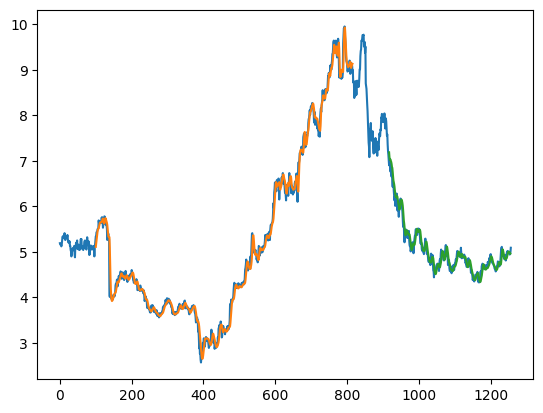

In [43]:
### Plotting
# shift train predictions for plotting
look_back=100
trainPredictPlot = numpy.empty_like(df)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()

In [44]:
len(test_data)

440

In [45]:
x_input=test_data[340:].reshape(1,-1)
x_input.shape


(1, 100)

In [46]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()

In [47]:
temp_input

[0.2601626016260164,
 0.26151761517615185,
 0.26151761517615185,
 0.26151761517615185,
 0.26151761517615185,
 0.2655826558265583,
 0.2696476964769648,
 0.26151761517615185,
 0.24254742547425484,
 0.23848238482384826,
 0.24119241192411928,
 0.25203252032520324,
 0.23848238482384826,
 0.2506775067750678,
 0.24932249322493233,
 0.27100271002710036,
 0.25745257452574527,
 0.2628726287262873,
 0.28726287262872635,
 0.2886178861788619,
 0.29403794037940384,
 0.2926829268292684,
 0.2831978319783199,
 0.28048780487804875,
 0.2791327913279133,
 0.27777777777777785,
 0.2818428184281844,
 0.2831978319783199,
 0.2831978319783199,
 0.28048780487804875,
 0.28997289972899737,
 0.2831978319783199,
 0.2818428184281844,
 0.28048780487804875,
 0.2831978319783199,
 0.2994579945799459,
 0.28997289972899737,
 0.29403794037940384,
 0.2926829268292684,
 0.31029810298102994,
 0.3048780487804879,
 0.31300813008130085,
 0.31978319783197834,
 0.32249322493224947,
 0.3048780487804879,
 0.3048780487804879,
 0.30894

In [60]:
# demonstrate prediction for next 10 days
from numpy import array

lst_output=[]
n_steps=100
i=0
while(i<10):

    if(len(temp_input)>100):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps,1))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        print(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1


print(lst_output)

0 day input [0.30487805 0.31300813 0.3197832  0.32249322 0.30487805 0.30487805
 0.30894309 0.29674797 0.29674797 0.29674797 0.29268293 0.2899729
 0.28861789 0.28455285 0.27913279 0.27777778 0.27913279 0.27100271
 0.27913279 0.28184282 0.28455285 0.28861789 0.29132791 0.30081301
 0.29810298 0.29674797 0.29539295 0.28590786 0.28861789 0.29403794
 0.30216802 0.31842818 0.33604336 0.34146341 0.34417344 0.31707317
 0.32249322 0.31571816 0.31707317 0.31707317 0.31165312 0.30758808
 0.31436314 0.3197832  0.30894309 0.30352304 0.31571816 0.32113821
 0.32655827 0.32926829 0.33197832 0.32520325 0.32655827 0.32655827
 0.32926829 0.32655827 0.32113821 0.32655827 0.32791328 0.34146341
 0.32667109 0.32877257 0.3298001  0.3301073  0.3300519  0.32984826
 0.32959446 0.32932702 0.32905772 0.32879168 0.32853267 0.32828435
 0.32804969 0.32783058 0.32762778 0.32744074 0.32726836 0.3271091
 0.32696101 0.3268221  0.32669032 0.32656419 0.32644194 0.32632232
 0.32620424 0.32608691 0.32596949 0.32585177 0.32573

In [61]:
day_new=np.arange(1,101)
day_pred=np.arange(101,111)

In [62]:
import matplotlib.pyplot as plt

In [63]:
len(df)

1257

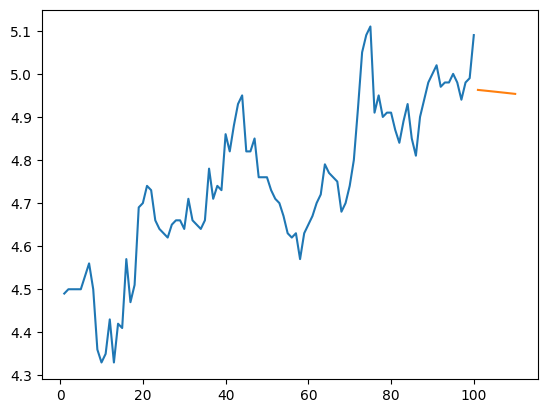

In [64]:
plt.plot(day_new,scaler.inverse_transform(df[1157:]))
plt.plot(day_pred,scaler.inverse_transform(lst_output))

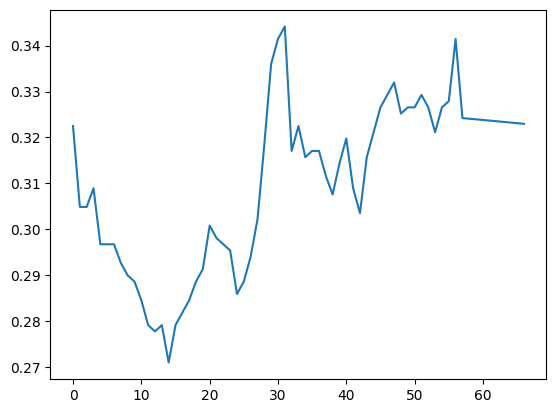

In [66]:
df3=df.tolist()
df3.extend(lst_output)
plt.plot(df3[1200:])

In [67]:
df3=scaler.inverse_transform(df3).tolist()

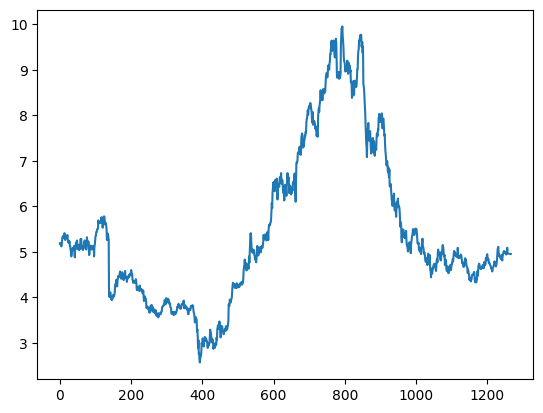

In [68]:
plt.plot(df3)